## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Read CSV

In [2]:
df = pd.read_csv("allyear.csv")
df2 = df.corr().abs()

In [3]:
df3 = df2[df2['POP_SNAP'] > 0.7]

In [4]:
df3

,population,unemployedRate,povertyRate,medianIncome,avgmealmon,homeless,pplweekmon,drivealone,carpooled,publicTrans,walked,meanHouseIncome,yeshealth,privatehealth,publichealth,nohealth,POP_SNAP
homeless,0.591383,0.025236,0.384512,0.266453,0.108051,1.000000,0.453408,0.449822,0.523188,0.569306,0.581056,0.064108,0.562882,0.473726,0.670776,0.684638,0.746321
walked,0.686380,0.087871,0.401652,0.164310,0.060991,0.581056,0.190965,0.438373,0.664018,0.947683,1.000000,0.001881,0.654390,0.570985,0.692385,0.876404,0.755258
publichealth,0.940448,0.146743,0.310709,0.157232,0.065868,0.670776,0.128149,0.844619,0.885444,0.652674,0.692385,0.006497,0.929147,0.858666,1.000000,0.878965,0.816768
nohealth,0.861809,0.078733,0.415315,0.193366,0.028130,0.684638,0.211323,0.684538,0.839203,0.831374,0.876404,0.007616,0.830742,0.743158,0.878965,1.000000,0.864358
POP_SNAP,0.660805,0.096361,0.674003,0.475714,0.138293,0.746321,0.443268,0.463006,0.674770,0.679789,0.755258,0.318795,0.623689,0.489266,0.816768,0.864358,1.000000


## SNAP Cutoff

In [5]:
drop1 = ['population','unemploymentRate', 'povertyRate','medianIncome', 'avgmealmon', 'pplweekmon', 'drivealone', 'carpooled', 'publicTrans','meanHouseIncome', 'yeshealth','privatehealth']
df3.drop(drop1, axis=1, inplace=True)

/Users/myra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
df3

,homeless,walked,publichealth,nohealth,POP_SNAP
homeless,1.000000,0.581056,0.670776,0.684638,0.746321
walked,0.581056,1.000000,0.692385,0.876404,0.755258
publichealth,0.670776,0.692385,1.000000,0.878965,0.816768
nohealth,0.684638,0.876404,0.878965,1.000000,0.864358
POP_SNAP,0.746321,0.755258,0.816768,0.864358,1.000000


## Variable Cutoff

In [7]:
upper = df3.where(np.triu(np.ones(df3.shape), k=1).astype(bool))

# Find features with correlation greater than 0.83
to_drop = [column for column in upper.columns if any(upper[column] > 0.83)]

# Drop features 
df3.drop(to_drop, axis=1, inplace=True)

/Users/myra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
df3

,homeless,walked,publichealth
homeless,1.000000,0.581056,0.670776
walked,0.581056,1.000000,0.692385
publichealth,0.670776,0.692385,1.000000
nohealth,0.684638,0.876404,0.878965
POP_SNAP,0.746321,0.755258,0.816768


In [9]:
drop3 = ['nohealth', 'POP_SNAP']
df3.drop(drop3, inplace=True)

/Users/myra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
df3

,homeless,walked,publichealth
homeless,1.000000,0.581056,0.670776
walked,0.581056,1.000000,0.692385
publichealth,0.670776,0.692385,1.000000


In [11]:
opvars = ['homeless','walked','publichealth','POP_SNAP']
df = df[opvars]
df

,homeless,walked,publichealth,POP_SNAP
0,357,5923,106540,32072
1,271,10764,247591,30301
2,518,1733,125525,19123
3,603,3665,186648,59120
4,90,2625,40763,6712
...,...,...,...,...
100,38,466,23619,9325
101,342,3684,71082,12874
102,57,1145,38680,4735
103,504,8130,165957,49795


In [12]:
df.to_csv('method1D.csv')

In [13]:
df.cov()

,homeless,walked,publichealth,POP_SNAP
homeless,1.860120e+05,1.548270e+06,2.309729e+07,1.062300e+07
walked,1.548270e+06,3.816945e+07,3.415221e+08,1.539941e+08
publichealth,2.309729e+07,3.415221e+08,6.374209e+09,2.152103e+09
POP_SNAP,1.062300e+07,1.539941e+08,2.152103e+09,1.089187e+09


In [14]:
df.var()

homeless        1.860120e+05
walked          3.816945e+07
publichealth    6.374209e+09
POP_SNAP        1.089187e+09
dtype: float64

# Multiple Linear Regression

In [15]:
df = pd.read_csv("method1D.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [16]:
df

,homeless,walked,publichealth,POP_SNAP
0,357,5923,106540,32072
1,271,10764,247591,30301
2,518,1733,125525,19123
3,603,3665,186648,59120
4,90,2625,40763,6712
...,...,...,...,...
100,38,466,23619,9325
101,342,3684,71082,12874
102,57,1145,38680,4735
103,504,8130,165957,49795


In [17]:
x = df.drop(['POP_SNAP'],axis=1).values
y = df['POP_SNAP'].values

In [18]:
# splitting dataset into training and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [19]:
# training model on training set
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [20]:
# predict test set results
y_pred=ml.predict(x_test)
print(y_pred)

[  9686.57098012  51779.13118086  30955.0363404    3713.64080447
  67808.38337443 120061.63113654    321.44737337   -204.18490638
  48526.17639484  47242.63978064  49596.40756902  31487.76609475
   4053.66331203  30916.22628203  15849.73483271   5468.87416906
  68852.54467627  48216.66151972  39981.96051963 100507.45117886
  69357.83323228  11549.58344322  47535.80426444  59039.1707638
  49320.28444309  41335.08092874 113945.25853464  51875.66513497
  31713.39686395   -354.53163718  31431.55577442  60783.92566649]


In [21]:
#ml.predict([[263670,4.875000,0.111,3.43,62.840000,4174]])

Text(0.5, 1.0, 'Method 1D')

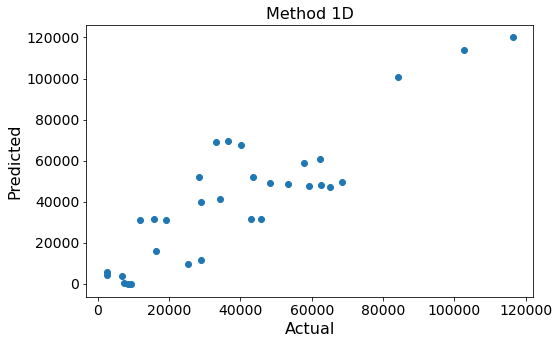

In [23]:
# scatterplot of results
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Predicted', fontsize=16)
plt.title('Method 1D', fontsize=16)

In [24]:
pred_y_df = pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
0,25400,9686.570980,15713.429020
1,43657,51779.131181,-8122.131181
2,19123,30955.036340,-11832.036340
3,6672,3713.640804,2958.359196
4,40208,67808.383374,-27600.383374
5,116345,120061.631137,-3716.631137
6,7269,321.447373,6947.552627
7,9325,-204.184906,9529.184906
8,53298,48526.176395,4771.823605
9,65177,47242.639781,17934.360219


In [25]:
# define our intput
X2 = sm.add_constant(x)

# create a OLS model
model = sm.OLS(y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     121.3
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           2.39e-33
Time:                        20:28:40   Log-Likelihood:                -1160.8
No. Observations:                 105   AIC:                             2330.
Df Residuals:                     101   BIC:                             2340.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4127.0682   2971.423     -1.389      0.1